1. Data Preprocessing
>Load and explore the dataset.
>Normalize the feature vectors using MinMaxScaler.
>Encode activity labels using LabelEncoder.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Explore dataset
print(train.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(562), object(1)
memory usage: 11.7+ MB
None


In [ ]:
print(train.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2720.000000        2720.000000        2720.000000   
mean            0.272655          -0.017572          -0.108443   
std             0.079026           0.034063           0.052408   
min            -1.000000          -0.684097          -1.000000   
25%             0.259004          -0.026179          -0.122525   
50%             0.277008          -0.017090          -0.108648   
75%             0.291823          -0.008955          -0.095708   
max             0.515654           0.324130           0.543939   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2720.000000       2720.000000       2720.000000       2720.000000   
mean          -0.570409         -0.429117         -0.560695         -0.600026   
std            0.441133          0.533145          0.440260          0.413206   
min           -0.999533         -0.999873         -0.999454         -0.999571   


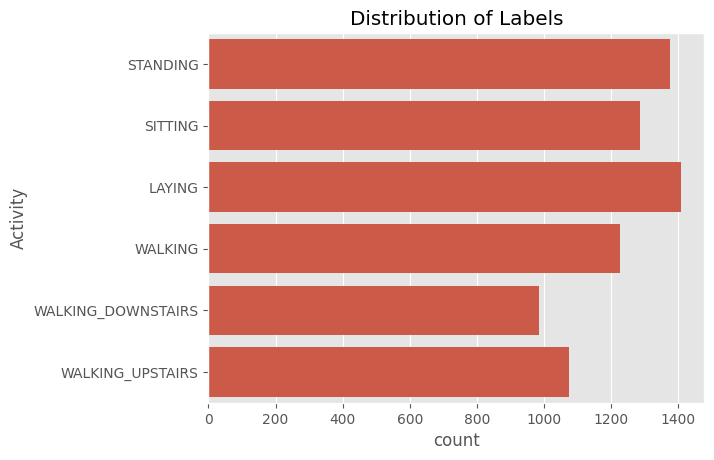

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style of the plot to 'ggplot' (optional but recommended for consistency)
plt.style.use('ggplot')
# Display plots inline
%matplotlib inline
# Describe the 'Activity' column in the 'train' dataframe (prints summary statistics)
train['Activity'].describe()
# Create a count plot using seaborn, with 'Activity' column values on the y-axis
ax = sns.countplot(y=train['Activity'])
# Set title for the plot
ax.set_title('Distribution of Labels')
# Display the plot
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Create an instance of SimpleImputer with strategy='mean' to handle missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data to impute missing values with the mean
train_imputed = pd.DataFrame(imputer.fit_transform(train.drop('Activity', axis=1)))

# Transform the test data using the fitted imputer from the training data
test_imputed = pd.DataFrame(imputer.transform(test.drop('Activity', axis=1)))

In [ ]:
# Restore column names after imputation
train_imputed.columns = train.drop('Activity', axis=1).columns
test_imputed.columns = test.drop('Activity', axis=1).columns

In [ ]:
# Normalize feature vectors
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_imputed)  # Use imputed data
X_test = scaler.transform(test_imputed)  # Use imputed data

In [ ]:
from sklearn.decomposition import PCA
# Initialize PCA with number of components to retain
pca = PCA(n_components=70)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the test data using the fitted PCA
X_test_pca = pca.transform(X_test)

# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Convert the transformed principal components (X_train_pca) into a pandas DataFrame
principle_components = pd.DataFrame(X_train_pca)

In [ ]:
principle_components.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
7349,2.948094,-1.569288,0.518250,1.083466,0.370471,0.116210,-0.515992,-0.318460,0.206048,0.618015,...,0.018095,-0.104057,0.022093,0.146078,0.166215,0.042887,-0.152525,0.071408,0.185546,0.114753
7350,2.731021,-1.745369,0.537668,0.939139,0.422485,0.105571,-0.730806,-0.387968,0.447701,0.794737,...,-0.031513,-0.048095,0.034490,0.005306,0.033103,0.125272,-0.202198,0.121870,0.176974,0.156643
7351,2.768878,-1.467126,0.180998,0.633291,0.493468,-0.130318,-0.335763,-0.689367,0.420479,0.026388,...,0.030064,-0.105033,0.074925,-0.048218,0.039174,0.116807,-0.081998,0.309463,0.302642,0.142701


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode the activity labels for training data
y_train = encoder.fit_transform(train['Activity'])

# Encode the activity labels for test data
y_test = encoder.transform(test['Activity'])

In [ ]:
# Check for and fix label values outside the valid range
y_train[y_train == 6] = 5
y_test[y_test == 6] = 5

In [ ]:
# Check the number of samples
print(f"Train set size: {train.shape}")
print(f"Test set size: {test.shape}")
print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"X_train_pca size: {X_train_pca.shape}")
print(f"X_test_pca size: {X_test_pca.shape}")
print(f"y_train size: {len(y_train)}")
print(f"y_test size: {len(y_test)}")

Train set size: (7352, 563)
Test set size: (2947, 563)
X_train size: (7352, 562)
X_test size: (2947, 562)
X_train_pca size: (7352, 70)
X_test_pca size: (2947, 70)
y_train size: 7352
y_test size: 2947


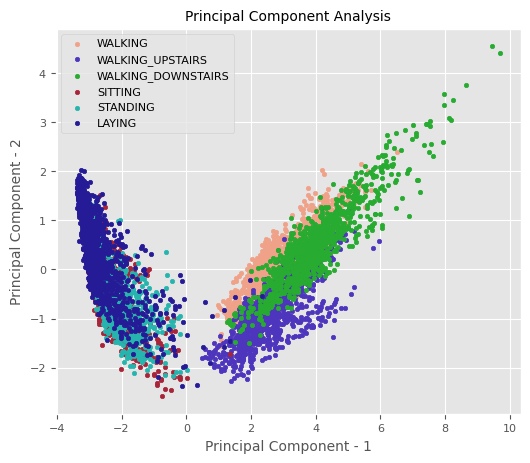

In [ ]:
# Initialize a new figure
plt.figure(figsize=(6, 5))

# Set font sizes for ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Set labels for x-axis and y-axis
plt.xlabel('Principal Component - 1', fontsize=10)
plt.ylabel('Principal Component - 2', fontsize=10)

# Set title for the plot
plt.title("Principal Component Analysis", fontsize=10)

# Define activity targets and corresponding colors
targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
colors = ['#f0a289', '#4e35bd', '#27ab30', '#a82539', '#26b5ae', '#251b96']

# Iterate over targets and colors to plot each activity
for target, color in zip(targets, colors):
    # Filter indices of the current target activity
    indicesToKeep = train['Activity'] == target

    # Scatter plot of principal components 1 and 2, colored by activity
    plt.scatter(principle_components.loc[indicesToKeep, 0],
                principle_components.loc[indicesToKeep, 1], c=color, s=10)

# Add legend with target labels and adjust size
plt.legend(targets, prop={'size': 8})

# Display the plot
plt.show()

3.Feature Engineering

• Extract relevant features from the time and frequency domain.

# • Visualize the features using PLOTLY to understand their distribution and importance

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import skew, kurtosis
from scipy.fftpack import fft

In [ ]:
# Load the data
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

In [ ]:
# Separate the 'Activity' column from the training data and assign it to y_train
y_train = X_train.pop('Activity')

# Separate the 'Activity' column from the test data and assign it to y_test
y_test = X_test.pop('Activity')

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Function to extract time domain features
def extract_time_features(data):
    # Initialize an empty DataFrame to store features
    features = pd.DataFrame()
    # Calculate mean across each row (axis=1) and add as a feature 'mean'
    features['mean'] = data.mean(axis=1)
    # Calculate standard deviation across each row (axis=1) and add as a feature 'std'
    features['std'] = data.std(axis=1)
    # Calculate skewness across each row (axis=1) using lambda function and add as a feature 'skew'
    features['skew'] = data.apply(lambda x: skew(x), axis=1)
    # Calculate kurtosis across each row (axis=1) using lambda function and add as a feature 'kurtosis'
    features['kurtosis'] = data.apply(lambda x: kurtosis(x), axis=1)
    # Return the DataFrame containing extracted features
    return features

In [ ]:
# Function to extract frequency domain features
def extract_frequency_features(data):
    features = pd.DataFrame()
    data_fft = np.abs(fft(data, axis=1))
    features['fft_mean'] = data_fft.mean(axis=1)
    features['fft_std'] = data_fft.std(axis=1)
    features['fft_skew'] = pd.DataFrame(data_fft).apply(lambda x: skew(x), axis=1)
    features['fft_kurtosis'] = pd.DataFrame(data_fft).apply(lambda x: kurtosis(x), axis=1)
    return features

In [ ]:
# Extract time domain features
time_features_train = extract_time_features(X_train)
time_features_test = extract_time_features(X_test)


In [ ]:
# Extract frequency domain features
frequency_features_train = extract_frequency_features(X_train)
frequency_features_test = extract_frequency_features(X_test)

In [ ]:
# Combine all features
features_train = pd.concat([time_features_train, frequency_features_train], axis=1)
features_test = pd.concat([time_features_test, frequency_features_test], axis=1)

Visualize Features using Plotly

In [ ]:
# Visualize features using Plotly
def visualize_features(features, y, title):
  # Create a copy of the features DataFrame to avoid modifying the original data
    df = features.copy()
    # Add the activity labels to the DataFrame
    df['Activity'] = y.values
    fig = px.scatter_matrix(df, dimensions=df.columns[:-1], color='Activity', title=title, height=800, width=800)
    fig.show()

visualize_features(features_train, y_train, "Training Data Feature Distribution")
visualize_features(features_test, y_test, "Test Data Feature Distribution")

In [ ]:
# Print shapes to verify
print("Features train shape: ", features_train.shape)
print("Features test shape: ", features_test.shape)


Features train shape:  (7352, 8)
Features test shape:  (2947, 8)


3. Model Building
>Design and implement a neural network using the Keras library.
>Experiment with different architectures such as number of layers, neurons, activation functions.

In [ ]:
#Installation
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 946.2 kB/s eta 0:00:00


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialize a Sequential model
model = Sequential()

# Add a Dense layer with 256 units, ReLU activation, and specify input shape
# Input shape is the number of principal components after PCA
model.add(Dense(256, input_shape=(X_train_pca.shape[1],), activation='relu'))
# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))
# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Add a Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# The number of units should match the number of classes in the target variable
model.add(Dense(6, activation='softmax'))

# Compile the model
# Use 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and track accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with test data as validation
history = model.fit(X_train_pca, y_train, epochs=40, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/50
101/101 [==============================] - 2s 6ms/step - loss: 1.2699 - accuracy: 0.4639 - val_loss: 0.6025 - val_accuracy: 0.7503
Epoch 2/50
101/101 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.7482 - val_loss: 0.3449 - val_accuracy: 0.8721
Epoch 3/50
101/101 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.8563 - val_loss: 0.3031 - val_accuracy: 0.8856
Epoch 4/50
101/101 [==============================] - 0s 4ms/step - loss: 0.2392 - accuracy: 0.9075 - val_loss: 0.2909 - val_accuracy: 0.8921
Epoch 5/50
101/101 [==============================] - 1s 8ms/step - loss: 0.1946 - accuracy: 0.9219 - val_loss: 0.3428 - val_accuracy: 0.8839
Epoch 6/50
101/101 [==============================] - 1s 9ms/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.3323 - val_accuracy: 0.8921
Epoch 7/50
101/101 [==============================] - 1s 9ms/step - loss: 0.1381 - accuracy: 0.9491 - val_loss: 0.3932 - val_accuracy: 0.8860
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_acc}')

93/93 [==============================] - 0s 2ms/step - loss: 0.9094 - accuracy: 0.8867
Test accuracy: 0.8866643905639648


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Build an experimental neural network with different architecture and activation functions
model_experiment = Sequential()

# Add a dense layer with 512 units, tanh activation function, and input shape based on PCA-transformed data
model_experiment.add(Dense(512, input_shape=(X_train_pca.shape[1],), activation='tanh'))
model_experiment.add(Dropout(0.4))  # Dropout layer to prevent overfitting

# Add a dense layer with 256 units and relu activation function
model_experiment.add(Dense(256, activation='relu'))
model_experiment.add(Dropout(0.4))  # Dropout layer

# Add a dense layer with 128 units and sigmoid activation function
model_experiment.add(Dense(128, activation='sigmoid'))
model_experiment.add(Dropout(0.4))  # Dropout layer

# Add a dense layer with 64 units and elu activation function
model_experiment.add(Dense(64, activation='elu'))
model_experiment.add(Dropout(0.4))  # Dropout layer

# Add a dense layer with 6 units for the 6 activity classes and softmax activation function
model_experiment.add(Dense(6, activation='softmax'))

# Compile the model with rmsprop optimizer, sparse_categorical_crossentropy loss function, and accuracy metric
model_experiment.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model on PCA-transformed training data and validate on PCA-transformed test data
history = model.fit(X_train_pca, y_train, epochs=40, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/40
101/101 [==============================] - 1s 9ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 1.0880 - val_accuracy: 0.8792
Epoch 2/40
101/101 [==============================] - 1s 8ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.9368 - val_accuracy: 0.8870
Epoch 3/40
101/101 [==============================] - 1s 9ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 1.0718 - val_accuracy: 0.8806
Epoch 4/40
101/101 [==============================] - 1s 6ms/step - loss: 0.0233 - accuracy: 0.9956 - val_loss: 1.0025 - val_accuracy: 0.8775
Epoch 5/40
101/101 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.8985 - val_accuracy: 0.8826
Epoch 6/40
101/101 [==============================] - 1s 7ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 1.0626 - val_accuracy: 0.8768
Epoch 7/40
101/101 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 1.0255 - val_accuracy: 0.8792
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_acc}')

93/93 [==============================] - 0s 2ms/step - loss: 1.0822 - accuracy: 0.8816
Test accuracy: 0.8815745115280151


4. Hyperparameter Tuning
>Utilize KerasTuner for hyperparameter optimization.
>Perform Random Search to find the best set of hyperparameters.

In [ ]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define a function to build a model with hyperparameters using KerasTuner
def build_model(hp):
    model = Sequential()
    # Choose activation function from relu, tanh, or sigmoid based on hyperparameter search
    activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    # Add a dense layer with variable number of units and chosen activation function
    model.add(Dense(hp.Int('units', min_value=64, max_value=512, step=64), activation=activation, input_shape=(X_train_pca.shape[1],)))
    # Add dropout layer with variable dropout rate
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Loop to add additional dense layers based on number of layers hyperparameter
    for i in range(hp.Int('num_layers', 1, 3)):
        # Add dense layer with variable number of units and chosen activation function
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=256, step=64), activation=activation))
        # Add dropout layer with variable dropout rate
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Add output layer with 6 units for the 6 activity classes and softmax activation function
    model.add(Dense(6, activation='softmax'))

    # Compile the model with Adam optimizer, sparse_categorical_crossentropy loss function, and accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize a KerasTuner RandomSearch object
tuner = kt.RandomSearch(
    build_model,  # Use the build_model function to define the model architecture
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of times to train each model with different initializations
    directory='tuner_results',  # Directory to save results
    project_name='uci_har_tuning'  # Name of the tuning project
)

# Perform hyperparameter search using KerasTuner, training on PCA-transformed training data and validating on PCA-transformed test data
tuner.search(X_train_pca, y_train, epochs=50, validation_data=(X_test_pca, y_test))

# Get the best model based on validation accuracy from the tuner results
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the PCA-transformed test data
test_loss, test_acc = best_model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_acc}')  # Print the test accuracy achieved by the best model


Trial 10 Complete [00h 01m 03s]
val_accuracy: 0.8983712196350098

Best val_accuracy So Far: 0.900916188955307
Total elapsed time: 00h 15m 06s
93/93 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.9030
Test accuracy: 0.9029521346092224


5. Model Evaluation
>Evaluate the model on the test set.
>Aim to achieve a minimum accuracy of 90%.

In [ ]:
# Evaluate the model
test_loss, test_acc = best_model.evaluate(X_test_pca, y_test)
print(f'Test accuracy: {test_acc}')


93/93 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.9030
Test accuracy: 0.9029521346092224
